### <font color='blue'>カスケードしたチャンカを用いた入れ子構造の構築</font>

ここまで見てきたチャンク構造は比較的平坦。<br>
木構造についてはタグ付けされたトークンで構成され、NPのようなチャンク節点下で任意に分類。<br>

しかし、単純に再帰的なルールを含む多段階チャンク文法を利用することで、任意の深さのチャンク構造を作ることも可能。<br>

以下にNP、PP、VP、Sを扱うチャンカについて記述する。<br>

In [1]:
# チャンキング文法
grammar = """
    NP : {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
    PP: {<IN><NP>}               # Chunk prepositions followed by NP
    VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
    CLAUSE: {<NP><VP>}           # Chunk NP, VP
    """

In [3]:
import nltk

# チャンカの作成
cp = nltk.RegexpParser(grammar)

In [4]:
# チャンキングする文章
sentence = [("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"),
    ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]

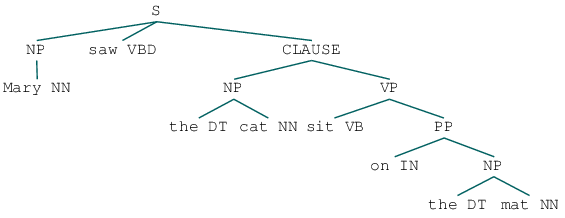

In [6]:
# チャンキングした文章の木構造の表示
cp.parse(sentence)

上記の結果を見ると、sawから始まるVPを見逃していることが分かる。<br>

In [8]:
# さらに深い入れ子構造をもつ文章を処理させる
sentence = [("John", "NNP"), ("thinks", "VBZ"), ("Mary", "NN"),
("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"),
("on", "IN"), ("the", "DT"), ("mat", "NN")]

In [9]:
print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


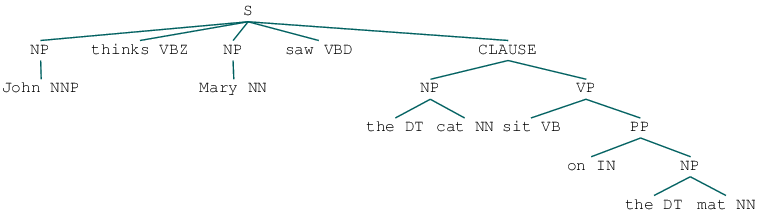

In [10]:
cp.parse(sentence)

上記からsawのチャンクを見逃していることが分かる。<br>

上記の問題について解決するためには、チャンカにパターンを繰り返し適用させる。<br>
つまり、全てのパターンを試した後、チャンカがその処理を繰り返す。<br>

In [11]:
# チャンカの作成
cp = nltk.RegexpParser(grammar, loop=2)

In [12]:
print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (CLAUSE
    (NP Mary/NN)
    (VP
      saw/VBD
      (CLAUSE
        (NP the/DT cat/NN)
        (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))


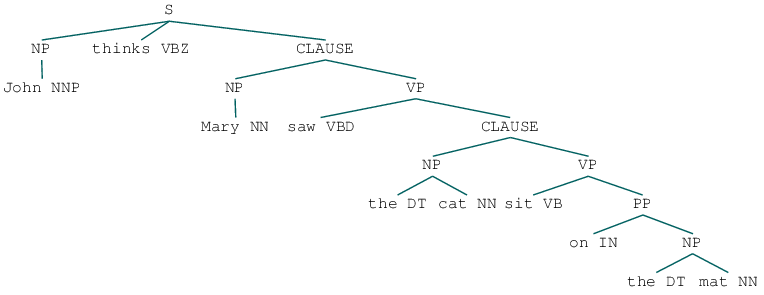

In [13]:
cp.parse(sentence)

上記からsawというVPチャンカを見逃していないことが分かる。<br>